In [1]:
from diffusers import StableDiffusionPipeline
import torch
import os

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

os.makedirs("synthetic_data", exist_ok=True)

prompts = [
    "A cat sitting on a sofa",
    "A dog playing in a park",
    "A mountain landscape",
    "A futuristic city",
    "A robot reading a book"
]

for i, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]
    image.save(f"synthetic_data/image_{i+1}.png")


2026-01-15 05:50:43.219393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768456243.412163      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768456243.469690      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768456243.936926      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768456243.936962      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768456243.936965      55 computation_placer.cc:177] computation placer alr

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

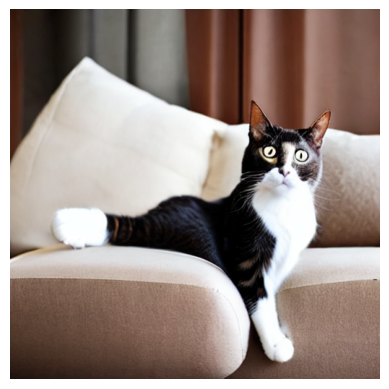

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/kaggle/working/synthetic_data/image_1.png")
plt.imshow(img)
plt.axis("off")


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

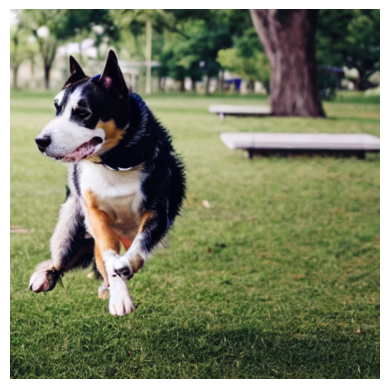

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/kaggle/working/synthetic_data/image_2.png")
plt.imshow(img)
plt.axis("off")


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

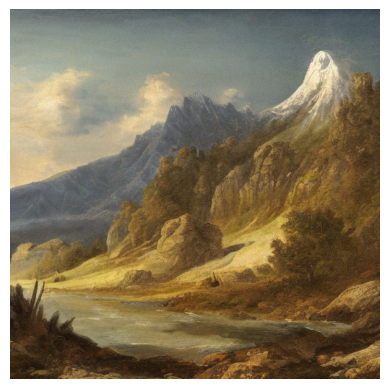

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/kaggle/working/synthetic_data/image_3.png")
plt.imshow(img)
plt.axis("off")


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

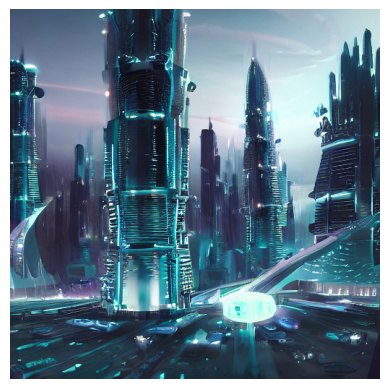

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("/kaggle/working/synthetic_data/image_4.png")
plt.imshow(img)
plt.axis("off")


# model 2 clip

In [8]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.9 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-kxd_g4rh
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-kxd_g4rh
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369490 sha256=81f9e745a060c11b0421b485831094c9b6dda957e5ebbb54c7798658203cba56
  Stored in directory: /tmp/pip-ephem-wheel-cache-k08e_ur8/wheels/35/3e/df/3d24cbfb3b6a06f17a2bfd7d1138900d4365d9028aa8f6e92f
Successfully built clip


In [9]:
import clip
from PIL import Image

In [10]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)


100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 102MiB/s]


In [11]:
image = preprocess(Image.open("synthetic_data/image_1.png")).unsqueeze(0).to(device)


In [12]:
texts = [
    "a cat sitting on a sofa",
    "a dog playing in a park",
    "a mountain landscape",
    "a robot reading a book"
]

text_tokens = clip.tokenize(texts).to(device)


In [13]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text_tokens)

    similarity = (image_features @ text_features.T).softmax(dim=-1)

print("Similarity scores:", similarity)


Similarity scores: tensor([[9.9951e-01, 2.2650e-06, 3.8004e-04, 9.6083e-05]], device='cuda:0',
       dtype=torch.float16)


In [14]:
best_match = similarity.argmax().item()
print("Predicted description:", texts[best_match])


Predicted description: a cat sitting on a sofa
